# Group project about Lending club case study

## Executive summary

Given a dataset of a lending club containing data from 2007 to 2011, we need to analyse to find bad debt customers patterns. These patterns may help to prevent bad debt for new to bank customers in future. In the scope of analysis, we can only focus on some descriptive statistics analysis to determine patterns. Although we apply univariate analysis on some variables, it's not really univariate. Because we always combine them with loan status.

After analysis, we detect some indicators that may be helpful for future use (if we need to build predictive analysis for this case study).

## Data preparation and cleansing
### Import neccessary packages

Although in Python we can import packages anywhere we want, as long as it's prior the use, it'd be better to keep all of neccessary packages in one place. It's easer for reference.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

### import dataset from current working folder

In [2]:
data = pd.read_csv("loan.csv")

/Users/nortonle/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### determining dataset dimension

In [3]:
data.shape

(39717, 111)

### Drop null columns if any

Because there is 111 columns, there may be some columns contain all null values. 

In [4]:
(data.isnull().sum() == len(data)).sum()

54

There are 54 columns contains all null values. Those column can be just left remain untouch, or can be simply dropped completely. In this case, they are removed, just to make the data leaner.

In [5]:
data = data.dropna(how = "all", axis = 1)

all columns with all null values are dropped, and new dataset are assigned back to old data set. It's time to have an overview of the data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Initially, the data had 111 columns. After 54 columns were dropped, 57 columns remains.

### Remove outliers if any

Ideally, outlier removal should be done during univariate analysis. However, we can also remove outlier before starting analysing. In this case, all numeric variables are considered to be remove outliers

#### Annual income

To determine outliers, histogram is the best option to start with.

Statistical summary metrics: 
count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
----------------------------------------
Calculating skewness: 
30.949184600959956
Annual income histogram


<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

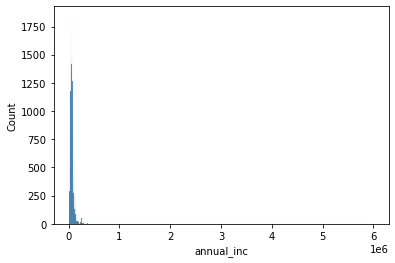

In [7]:
print("Statistical summary metrics: ")
print(data.annual_inc.describe())
print("-"*40)
print("Calculating skewness: ")
print(data.annual_inc.skew())
print("Annual income histogram")
sns.histplot(data['annual_inc'])

As the annual income is very right skewed, it'd be better to normalise them using lograrithm

Statistical summary metrics after taking lograrithm: 
count    39717.000000
mean        10.972970
std          0.558850
min          8.294050
25%         10.606684
50%         10.985293
75%         11.318126
max         15.607270
Name: annual_inc, dtype: float64
----------------------------------------
Calculating skewness after taking lograrithm: 
0.1309729635197898
Annual income histogram after taking lograrithm: 


<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

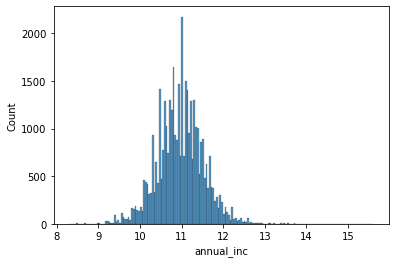

In [8]:
print("Statistical summary metrics after taking lograrithm: ")
print(np.log(data['annual_inc']).describe())
print("-"*40)
print("Calculating skewness after taking lograrithm: ")
print(np.log(data['annual_inc']).skew())
print("Annual income histogram after taking lograrithm: ")
sns.histplot(np.log(data['annual_inc']))

Alright, the distribution now look quite similar to normal distribution. From above histogram, all income less than log(9) and greater than log(13) should be removed

In [9]:
data = data[(data.annual_inc >= np.power(np.e, 9)) & (data.annual_inc <= np.power(np.e, 13))]
data.shape

(39598, 57)

#### loan_amnt

Statistical summary metrics: 
count    38018.000000
mean     11068.381425
std       7346.239912
min        500.000000
25%       5400.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
----------------------------------------
Calculating skewness: 
1.0771380649355469
Loan amount histogram


<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

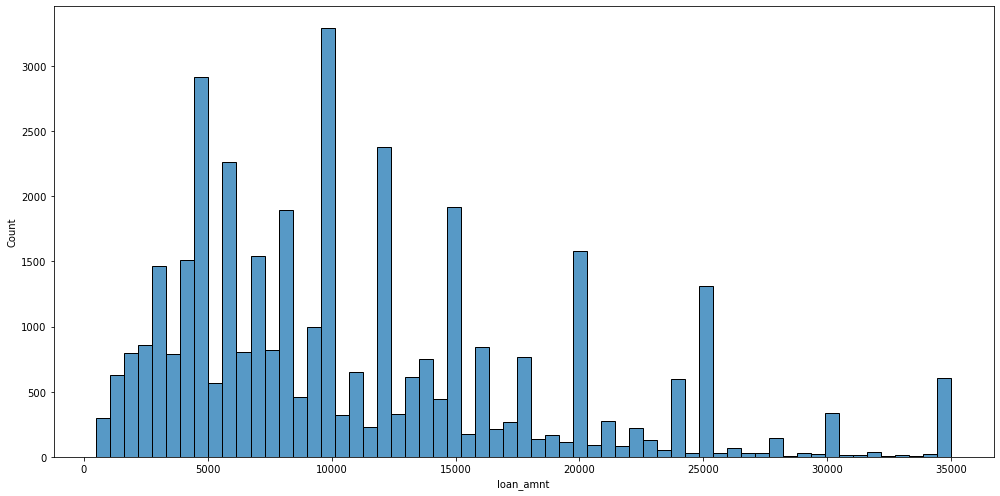

In [35]:
print("Statistical summary metrics: ")
print(data.loan_amnt.describe())
print("-"*40)
print("Calculating skewness: ")
print(data.loan_amnt.skew())
print("Loan amount histogram")
sns.histplot(data['loan_amnt'])

It's a bit skewed to the right, let's see if lograrithm helps to bring them back to normal distribution.

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

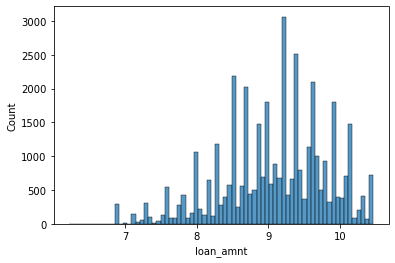

In [10]:
sns.histplot(np.log(data['loan_amnt']))

Unfortunately, it does not. In fact, we should not force the loan amount to normal distribution, as it should obey Benford's law. Small amount of loan amount should be more than big loan amount.

## Univariate analysis.

#### Loan status
This analysis focus on finding the pattern may affect bad debts, tt's interesting to have a look at the loan_status column, to see how many cardinalities are there, and what are they. 

In [11]:
data['loan_status'].value_counts()

Fully Paid     32851
Charged Off     5609
Current         1138
Name: loan_status, dtype: int64

Because we are only interested in completed loans, regardless if they were fully paid or charged off, all current loans should be removed from the dataset.

In [12]:
data = data[-(data.loan_status == 'Current')]

Let's see if current loans are removes.

In [13]:
data['loan_status'].value_counts()

Fully Paid     32851
Charged Off     5609
Name: loan_status, dtype: int64

#### Issue_d 

There are several date dimension in this data, but issue_d is more important, as it's the cohort of a loan. Using cohort, we can see if certain cohort might or might not have more bad debts than others. 

First of all, we should have a look at all cardinalities in this variable.

In [14]:
data['issue_d'].value_counts()

Nov-11    2059
Dec-11    2040
Oct-11    1938
Sep-11    1909
Aug-11    1797
Jul-11    1743
Jun-11    1725
May-11    1608
Apr-11    1558
Mar-11    1442
Jan-11    1373
Feb-11    1295
Dec-10    1266
Oct-10    1123
Jul-10    1117
Nov-10    1117
Sep-10    1082
Aug-10    1074
Jun-10    1024
May-10     913
Apr-10     823
Mar-10     733
Feb-10     624
Nov-09     594
Dec-09     593
Jan-10     586
Oct-09     540
Sep-09     449
Aug-09     406
Jul-09     372
Jun-09     354
May-09     317
Apr-09     288
Mar-09     276
Feb-09     260
Jan-09     238
Mar-08     234
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     169
Apr-08     155
Oct-08      96
Dec-07      84
Jul-08      83
Aug-08      71
May-08      70
Jun-08      66
Oct-07      46
Nov-07      36
Aug-07      33
Sep-08      32
Jul-07      29
Sep-07      18
Jun-07       1
Name: issue_d, dtype: int64

Second, additional data transformation is required. By default, all column in pandas data frame is series, we have to convert this variable to date. Then, an summary this variable using loan_status would be more helpful.

In [15]:
pd.pivot_table(data
               , values="loan_amnt"
               , index = "loan_status"
               , columns = pd.DatetimeIndex(pd.to_datetime(data["issue_d"], format='%b-%y')).year
               , aggfunc=['sum',  'count'] 
              )

sum                                           count        \
issue_d         2007      2008      2009       2010       2011  2007  2008   
loan_status                                                                  
Charged Off   463400   2739600   6228775   15900800   42542675    44   247   
Fully Paid   1699475  11615725  39962375  105647250  198027700   203  1310   

                                 
issue_d      2009   2010   2011  
loan_status                      
Charged Off   590   1476   3252  
Fully Paid   4097  10006  17235

It's seem year 2007 contribute small number of loans and loan amount. This year 2007 is considered an outlier and it's safe to be removed from current dataset. After year 2007 is remove, we need to see if there is any seasonal coefficient in each months of each years.

In [16]:
data = data[pd.DatetimeIndex(pd.to_datetime(data["issue_d"], format='%b-%y')).year != 2007]
cohort = pd.pivot_table(data
               , values="loan_amnt"
               , columns = "loan_status"
               , index =[pd.DatetimeIndex(pd.to_datetime(data["issue_d"], format='%b-%y')).year ## we have pivot table with two index. First index is year
                         , pd.to_datetime(data["issue_d"], format='%b-%y') ] ## second index is month
               , aggfunc=['sum',  'count'] 
              )

## After above pivot table are created, there is two main columns which are sum and count (as a result of aggfunc).
## Those two main columns are broken down smaller into two columns which are Charged Off and Fully Paid (cardininalities of loan_staus).
## If we need to address any columns, we need to specify the column name and so-call sub column name.
## Those two below line calculate % of amount charged off and fully paid per cohot.

cohort['% Amount charged Off'] = round(cohort[(  'sum', 'Charged Off')] / (cohort[(  'sum', 'Charged Off')] + cohort[(  'sum', 'Fully Paid')]) * 100, 2)
cohort['% Amount fully Paid'] = round(cohort[(  'sum', 'Fully Paid')] / (cohort[(  'sum', 'Charged Off')] + cohort[(  'sum', 'Fully Paid')]) * 100, 2)

cohort

sum                  count             \
loan_status        Charged Off Fully Paid Charged Off Fully Paid   
issue_d issue_d                                                    
2008    2008-01-01      366725    1391325          31        138   
        2008-02-01      303950    1375425          25        149   
        2008-03-01      578000    2091475          40        194   
        2008-04-01      331700    1224600          27        128   
        2008-05-01       69375     342025          10         60   
        2008-06-01       44600     335375           7         59   
        2008-07-01      140000     384925          17         66   
        2008-08-01       37900     374300           6         65   
        2008-09-01       26500     158425           5         27   
        2008-10-01      148500     632250          15         81   
        2008-11-01      346500    1356950          31        153   
        2008-12-01      345850    1948650          33        190   
2009    2009-01-01      274525    1908950          28        210   
        2009-02-01      341025    2000050          34        226   
        2009-03-01      297675    2355575          31        245   
        2009-04-01      417200    2258350          40        248   
        2009-05-01      437000    2672500          41        276   
        2009-06-01      448550    2693800          43        311   
        2009-07-01      474300    2985750          47        325   
        2009-08-01      448900    3480000          40        366   
        2009-09-01      641600    3938525          57        392   
        2009-10-01     1030850    4540025          86        454   
        2009-11-01      841500    5262275          81        513   
        2009-12-01      575650    5866575          62        531   
2010    2010-01-01      861025    5676200          75        511   
        2010-02-01      662575    6103150          63        561   
        2010-03-01      757500    6841825          69        664   
        2010-04-01      830550    7808875          82        741   
        2010-05-01     1421875    8464075         122        791   
        2010-06-01     1612175    8803325         164        860   
        2010-07-01     1373325    9779075         137        980   
        2010-08-01     1583825    9553850         147        927   
        2010-09-01     1850025    9337775         174        908   
        2010-10-01     1689825   10378025         159        964   
        2010-11-01     1703675   10765925         142        975   
        2010-12-01     1554425   12135150         142       1124   
2011    2011-01-01     2044575   12711000         186       1187   
        2011-02-01     2032725   12542300         167       1128   
        2011-03-01     2605900   13888375         207       1235   
        2011-04-01     2857750   14594775         221       1337   
        2011-05-01     3395300   14614050         289       1319   
        2011-06-01     3305550   15816675         266       1459   
        2011-07-01     3570250   15649800         277       1466   
        2011-08-01     3191200   18012200         267       1530   
        2011-09-01     4173900   18808600         307       1602   
        2011-10-01     4270325   19881375         308       1630   
        2011-11-01     4861900   20281125         335       1724   
        2011-12-01     6233300   21227425         422       1618   

                   % Amount charged Off % Amount fully Paid  
loan_status                                                  
issue_d issue_d                                              
2008    2008-01-01                20.86               79.14  
        2008-02-01                18.10               81.90  
        2008-03-01                21.65               78.35  
        2008-04-01                21.31               78.69  
        2008-05-01                16.86               83.14  
        2008-06-01                11.74               88.26  


There is no clear pattern on seasonal coefficient. Hence, bad debt may not be caused by any particular month of loan application. It's good to move on another variable.

#### emp_length

Similarity, we need to have a look at this variable cardinalities and their distribution.

In [17]:
round(data['emp_length'].value_counts() / len(data) * 100, 2)

10+ years    22.06
< 1 year     11.57
2 years      11.12
3 years      10.42
4 years       8.69
5 years       8.32
1 year        8.15
6 years       5.63
7 years       4.45
8 years       3.72
9 years       3.18
Name: emp_length, dtype: float64

Then, let's see if there is any relation to loan status.

In [18]:
pivot_emp_length = pd.pivot_table(data
                                  , values="loan_amnt"
                                  , columns = "loan_status"
                                  , index = "emp_length"
                                  , aggfunc=['sum',  'count'] 
                                 )

#creating a grand total amount column
pivot_emp_length['Total amount'] = pivot_emp_length[(  'sum', 'Charged Off')] + pivot_emp_length[(  'sum', 'Fully Paid')]

#deriving three new metrics which are % amount charge off and % fully paid. Those two new metrics are used to build 100% stack bar.
pivot_emp_length['% Amount charged Off'] = round(pivot_emp_length[(  'sum', 'Charged Off')] / pivot_emp_length['Total amount'] * 100, 2)
pivot_emp_length['% Amount fully Paid'] = round(pivot_emp_length[(  'sum', 'Fully Paid')] / pivot_emp_length['Total amount'] * 100, 2)
pivot_emp_length['Grand percent'] = pivot_emp_length['% Amount fully Paid'] + pivot_emp_length['% Amount charged Off']

#ordering % amount charge off descending order to see from the worst to the best.
pivot_emp_length = pivot_emp_length.sort_values(by=['% Amount charged Off'], ascending=False)

pivot_emp_length

sum                  count            Total amount  \
loan_status Charged Off Fully Paid Charged Off Fully Paid                
emp_length                                                               
10+ years      19277900   88674400        1320       7111    107952300   
7 years         3372125   16323275         260       1439     19695400   
8 years         2620325   14070875         201       1221     16691200   
6 years         3822025   20689750         304       1849     24511775   
5 years         5510350   29875575         457       2724     35385925   
< 1 year        6428375   36116825         621       3799     42545200   
1 year          4739725   26654025         448       2665     31393750   
3 years         6320150   36026225         553       3428     42346375   
4 years         5227475   30743050         456       2865     35970525   
9 years         2061000   12456300         156       1060     14517300   
2 years         6026800   36949075         561       3689     42975875   

            % Amount charged Off % Amount fully Paid Grand percent  
loan_status                                                         
emp_length                                                          
10+ years                  17.86               82.14         100.0  
7 years                    17.12               82.88         100.0  
8 years                    15.70               84.30         100.0  
6 years                    15.59               84.41         100.0  
5 years                    15.57               84.43         100.0  
< 1 year                   15.11               84.89         100.0  
1 year                     15.10               84.90         100.0  
3 years                    14.92               85.08         100.0  
4 years                    14.53               85.47         100.0  
9 years                    14.20               85.80         100.0  
2 years                    14.02               85.98         100.0

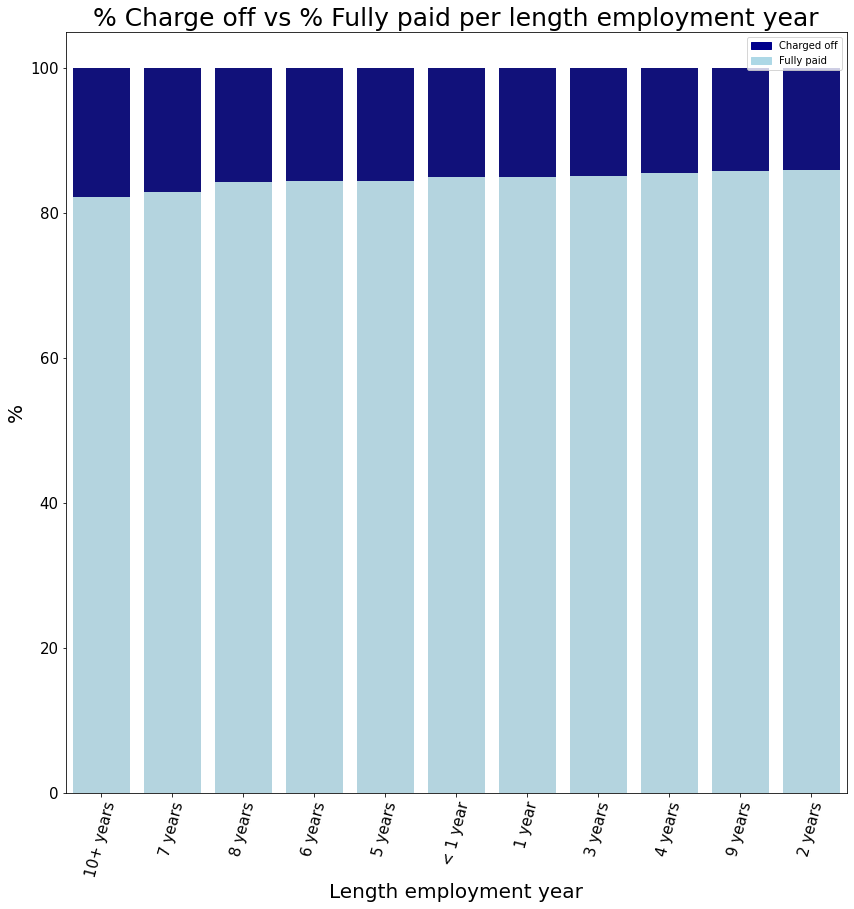

In [19]:
plt.figure(figsize=(14, 14))
## using Seaborn packages to draw stacked bar. In Seaborn, there is no stacked bar, so work-around solution is required.

## First, building a bar chart with total value
bar1 = sns.barplot(data = pivot_emp_length
                   , x = pivot_emp_length.index
                   , y = 'Grand percent'
                   , color="darkblue"
                  )

## Second, building a smaller chart with % charge off value, and placing both chart on top each other.
bar2 = sns.barplot(data = pivot_emp_length
                   , x = pivot_emp_length.index
                   , y = "% Amount fully Paid"
                   , color="lightblue"
                   , estimator=sum
                  )

## Third, adding legend to distinguish them.
top_bar = mpatches.Patch(color='darkblue', label='Charged off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully paid')
plt.legend(handles=[top_bar, bottom_bar])

## Finally, formatting the chart and making it look nicer.
bar2.set_xlabel("Length employment year", fontsize = 20) ## since the bar2 is overlap the bar1, we just need to format the bar2
bar2.set_ylabel("%", fontsize=20)
bar2.set_title("% Charge off vs % Fully paid per length employment year", fontsize=25)
bar2.tick_params(labelsize = 15)
bar2.set_xticklabels(bar2.get_xticklabels(),rotation = 75)


plt.show()

It's surprisingly that customers with more than 10 year of experience tend to less pay off the loan.

#### purpose

Now, move on to lending purpose to see if there is any particular purpose that may cause more bad debts.

In [20]:
pivot_purpose = pd.pivot_table(data
                               , values="loan_amnt"
                               , columns = "loan_status"
                               , index = "purpose"
                               , aggfunc=['sum',  'count'] 
                               )

#creating a grand total amount column
pivot_purpose['Total amount'] = pivot_purpose[(  'sum', 'Charged Off')] + pivot_purpose[(  'sum', 'Fully Paid')]

#deriving three new metrics which are % amount charge off and % fully paid. Those two new metrics are used to build 100% stack bar.
pivot_purpose['% Amount charged Off'] = round(pivot_purpose[(  'sum', 'Charged Off')] / pivot_purpose['Total amount'] * 100, 2)
pivot_purpose['% Amount fully Paid'] = round(pivot_purpose[(  'sum', 'Fully Paid')] / pivot_purpose['Total amount'] * 100, 2)
pivot_purpose['Grand percent'] = pivot_purpose['% Amount fully Paid'] + pivot_purpose['% Amount charged Off']

#ordering % amount charge off descending order to see from the worst to the best.
pivot_purpose = pivot_purpose.sort_values(by=['% Amount charged Off'], ascending=False)

pivot_purpose

sum                  count            Total amount  \
loan_status        Charged Off Fully Paid Charged Off Fully Paid                
purpose                                                                         
small_business         6780525   16250050         465       1262     23030575   
educational             435200    1674800          53        251      2110000   
renewable_energy        160000     680875          19         81       840875   
other                  5169300   25201625         625       3189     30370925   
medical                 908250    4520150         106        569      5428400   
debt_consolidation    37158675  187402000        2745      15198    224560675   
house                   745775    3888725          59        305      4634500   
vacation                311425    1701875          53        315      2013300   
moving                  519900    3223350          88        480      3743250   
home_improvement       4020700   27983150         339       2495     32003850   
credit_card            7026100   50679800         540       4436     57705900   
wedding                1031750    7906350          94        821      8938100   
car                    1162275    8920875         160       1331     10083150   
major_purchase         1981975   15219425         219       1915     17201400   

                   % Amount charged Off % Amount fully Paid Grand percent  
loan_status                                                                
purpose                                                                    
small_business                    29.44               70.56         100.0  
educational                       20.63               79.37         100.0  
renewable_energy                  19.03               80.97         100.0  
other                             17.02               82.98         100.0  
medical                           16.73               83.27         100.0  
debt_consolidation                16.55               83.45         100.0  
house                             16.09               83.91         100.0  
vacation                          15.47               84.53         100.0  
moving                            13.89               86.11         100.0  
home_improvement                  12.56               87.44         100.0  
credit_card                       12.18               87.82         100.0  
wedding                           11.54               88.46         100.0  
car                               11.53               88.47         100.0  
major_purchase                    11.52               88.48         100.0

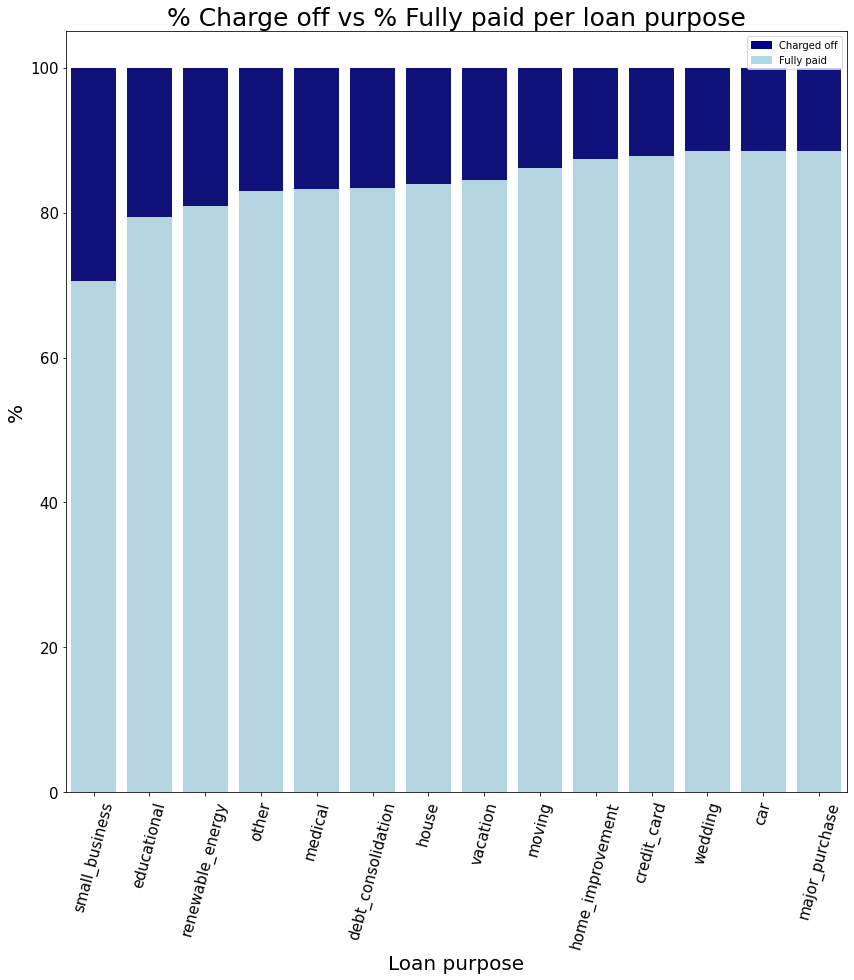

In [21]:
plt.figure(figsize=(14, 14))
## using Seaborn packages to draw stacked bar. In Seaborn, there is no stacked bar, so work-around solution is required.

## First, building a bar chart with total value
bar1 = sns.barplot(data = pivot_purpose
                   , x = pivot_purpose.index
                   , y = 'Grand percent'
                   , color="darkblue"
                  )

## Second, building a smaller chart with % charge off value, and placing both chart on top each other.
bar2 = sns.barplot(data = pivot_purpose
                   , x = pivot_purpose.index
                   , y = "% Amount fully Paid"
                   , color="lightblue"
                   , estimator=sum
                  )

## Third, adding legend to distinguish them.
top_bar = mpatches.Patch(color='darkblue', label='Charged off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully paid')
plt.legend(handles=[top_bar, bottom_bar])

## Finally, formatting the chart and making it look nicer.
bar2.set_xlabel("Loan purpose", fontsize = 20) ## since the bar2 is overlap the bar1, we just need to format the bar2
bar2.set_ylabel("%", fontsize=20)
bar2.set_title("% Charge off vs % Fully paid per loan purpose", fontsize=25)
bar2.tick_params(labelsize = 15)
bar2.set_xticklabels(bar2.get_xticklabels(),rotation = 75)


plt.show()

If a customer applies a loan for educational or small business, there may be a high potential that that loan may lead to bad debt.

#### home_ownership

Alright, let's see if home ownership status have any affects on bad debts.

In [22]:
pivot_home_ownership = pd.pivot_table(data
                                      , values="loan_amnt"
                                      , columns = "loan_status"
                                      , index = "home_ownership"
                                      , aggfunc=['sum',  'count'] 
                                     )

#creating a grand total amount column
pivot_home_ownership['Total amount'] = pivot_home_ownership[(  'sum', 'Charged Off')] + pivot_home_ownership[(  'sum', 'Fully Paid')]

#deriving three new metrics which are % amount charge off and % fully paid. Those two new metrics are used to build 100% stack bar.
pivot_home_ownership['% Amount charged Off'] = round(pivot_home_ownership[(  'sum', 'Charged Off')] / pivot_home_ownership['Total amount'] * 100, 2)
pivot_home_ownership['% Amount fully Paid'] = round(pivot_home_ownership[(  'sum', 'Fully Paid')] / pivot_home_ownership['Total amount'] * 100, 2)
pivot_home_ownership['Grand percent'] = pivot_home_ownership['% Amount fully Paid'] + pivot_home_ownership['% Amount charged Off']

#ordering % amount charge off descending order to see from the worst to the best.
pivot_home_ownership = pivot_home_ownership.sort_values(by=['% Amount charged Off'], ascending=False)

pivot_home_ownership

sum                    count            Total amount  \
loan_status    Charged Off   Fully Paid Charged Off Fully Paid                
home_ownership                                                                
OTHER             247450.0     772525.0        18.0       79.0    1019975.0   
RENT            29967225.0  151300775.0      2811.0    15490.0  181268000.0   
OWN              4809250.0   25134600.0       438.0     2507.0   29943850.0   
MORTGAGE        32387925.0  178035150.0      2298.0    14571.0  210423075.0   
NONE                   NaN      10000.0         NaN        1.0          NaN   

               % Amount charged Off % Amount fully Paid Grand percent  
loan_status                                                            
home_ownership                                                         
OTHER                         24.26               75.74         100.0  
RENT                          16.53               83.47         100.0  
OWN                           16.06               83.94         100.0  
MORTGAGE                      15.39               84.61         100.0  
NONE                            NaN                 NaN           NaN

We can see there are two outlier values which are OTHER and NONE. Those values only contribute 98 loans in total, so it's safe to remove them before any further analytics. In fact, it's also safe to leave them unchanged. Hereby, those two values are removed from original dataset explicitly, but the above pivot table are not reloaded.

Except those two outlier values, there is a slightly higher in charge off for customers who rent home compared to others. This is noticed for further analysis.

In [23]:
## remove two outlier in home_ownership.
data = data[~((data['home_ownership'] == 'OTHER') | (data['home_ownership'] == 'NONE'))]

#### dti - debt to income

Debt to income is an interesting metrics to determine customers' ability to pay back debts using their annual income. If customers have income way higher than debt, of course our loans are more likely to be paid back, vice versa. 

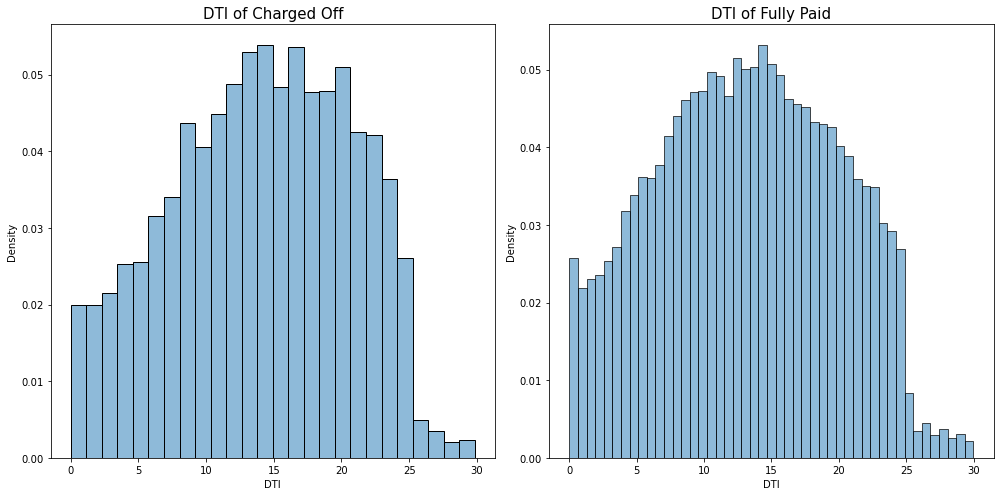

In [24]:
plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)

## creating two histogram for two loan status charge off and fully paid
hist_1= sns.histplot(data[data['loan_status'] == 'Charged Off']
             , x='dti'
             , hue='loan_status'
             , stat="density"
             , ax=axes[0]
             , legend=False
            )

hist_2 = sns.histplot(data[data['loan_status'] != 'Charged Off']
             , x='dti'
             , hue='loan_status'
             , stat="density"
             , ax=axes[1]  
             , legend=False             
            )

## formatting two histograms
hist_1.set_title("DTI of Charged Off", fontsize=15)
hist_1.set_xlabel("DTI", fontsize = 10)

hist_2.set_title("DTI of Fully Paid", fontsize=15)
hist_2.set_xlabel("DTI", fontsize = 10)

plt.show()

Although the left histogram is a bit left-skewed compared to right histogram, which is also considered normal distribution, those two chats are likely similar. There are several reason to support that:
* Both charts have same median, which is 15.
* Both charts have same range, which is from 0 to 30.
* Both outliers are very similar, which is from 25 to 30.

Then, we need to examine the impact of each histogram bins on bad debts.

In [25]:
## First, we need to create a new derived metrics having same bin-value. Creating a list variable conditions which have each bin value.
conditions = [
    (data['dti'] <= 5)
    , (data['dti'] > 5) & (data['dti'] <= 10)
    , (data['dti'] > 10) & (data['dti'] <= 15)
    , (data['dti'] > 15) & (data['dti'] <= 20)
    , (data['dti'] > 20) & (data['dti'] <= 25)
    , (data['dti'] > 25)
]

## Second, creating new list variable which is used to map which each above condition
new_dti = ['1. <= 5'
          , '2. 5 - 10'
          , '3. 10 - 15'
          , '4. 15 - 20' 
          , '5. 20 - 25'
          , '6. >= 25'
          ]

## Third, thanks to Numpy selection function.
data['new_dti'] = np.select(conditions, new_dti)

## Finally, apply same logic above to build pivot table
pivot_dti = pd.pivot_table(data
                           , values="loan_amnt"
                           , columns = "loan_status"
                           , index = "new_dti"
                           , aggfunc=['sum',  'count'] 
                          )

#creating a grand total amount column
pivot_dti['Total amount'] = pivot_dti[(  'sum', 'Charged Off')] + pivot_dti[(  'sum', 'Fully Paid')]

#deriving three new metrics which are % amount charge off and % fully paid. Those two new metrics are used to build 100% stack bar.
pivot_dti['% Amount charged Off'] = round(pivot_dti[(  'sum', 'Charged Off')] / pivot_dti['Total amount'] * 100, 2)
pivot_dti['% Amount fully Paid'] = round(pivot_dti[(  'sum', 'Fully Paid')] / pivot_dti['Total amount'] * 100, 2)
pivot_dti['Grand percent'] = pivot_dti['% Amount fully Paid'] + pivot_dti['% Amount charged Off']

#ordering % amount charge off descending order to see from the worst to the best.
pivot_dti = pivot_dti.sort_values(by=['new_dti'], ascending=True)

pivot_dti

sum                  count            Total amount  \
loan_status Charged Off Fully Paid Charged Off Fully Paid                
new_dti                                                                  
1. <= 5         6147825   41021675         609       4298     47169500   
2. 5 - 10      11859775   72735500         990       6769     84595275   
3. 10 - 15     17005625   91713575        1379       8162    108719200   
4. 15 - 20     17497000   83010350        1372       7366    100507350   
5. 20 - 25     13427700   59587025        1110       5437     73014725   
6. >= 25        1226475    6402400          87        536      7628875   

            % Amount charged Off % Amount fully Paid Grand percent  
loan_status                                                         
new_dti                                                             
1. <= 5                    13.03               86.97         100.0  
2. 5 - 10                  14.02               85.98         100.0  
3. 10 - 15                 15.64               84.36         100.0  
4. 15 - 20                 17.41               82.59         100.0  
5. 20 - 25                 18.39               81.61         100.0  
6. >= 25                   16.08               83.92         100.0

Surprisingly, the higher income customers have, the more likely bad bad debt is.

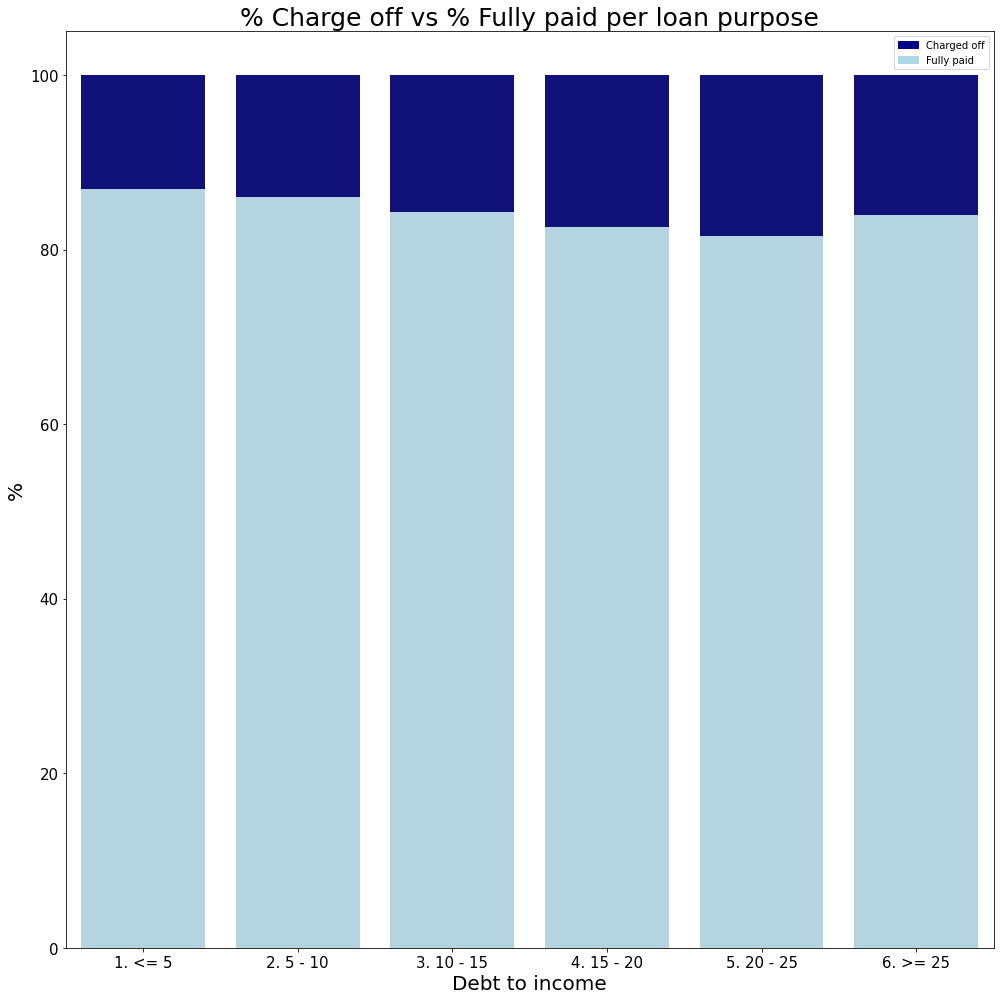

In [26]:
plt.figure(figsize=(14, 14))
## using Seaborn packages to draw stacked bar. In Seaborn, there is no stacked bar, so work-around solution is required.

## First, building a bar chart with total value
bar1 = sns.barplot(data = pivot_dti
                   , x = pivot_dti.index
                   , y = 'Grand percent'
                   , color="darkblue"
                  )

## Second, building a smaller chart with % charge off value, and placing both chart on top each other.
bar2 = sns.barplot(data = pivot_dti
                   , x = pivot_dti.index
                   , y = "% Amount fully Paid"
                   , color="lightblue"
                   , estimator=sum
                  )

## Third, adding legend to distinguish them.
top_bar = mpatches.Patch(color='darkblue', label='Charged off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully paid')
plt.legend(handles=[top_bar, bottom_bar])

## Finally, formatting the chart and making it look nicer.
bar2.set_xlabel("Debt to income", fontsize = 20) ## since the bar2 is overlap the bar1, we just need to format the bar2
bar2.set_ylabel("%", fontsize=20)
bar2.set_title("% Charge off vs % Fully paid per loan purpose", fontsize=25)
bar2.tick_params(labelsize = 15)

plt.show()

#### delinq_2yrs - History of deliquency in 2 years

An used-to-be-bad customers in history may be still in currently. Usually, during approval process, customers' credit history are also taken into consideration.

In [27]:
pivot_del_2yrs = pd.pivot_table(data
                                , values = "loan_amnt"
                                , columns = "loan_status"
                                , index = "delinq_2yrs"
                                , aggfunc = ["sum", "count"]
                               )

#creating a grand total amount column
pivot_del_2yrs['Total amount'] = np.where(pivot_del_2yrs[(  'sum', 'Charged Off')].isnull(), 0, pivot_del_2yrs[(  'sum', 'Charged Off')]) + np.where(pivot_del_2yrs[(  'sum', 'Fully Paid')].isnull(), 0, pivot_del_2yrs[(  'sum', 'Fully Paid')])
pivot_del_2yrs['Total loan'] = np.where(pivot_del_2yrs[(  'count', 'Charged Off')].isnull(), 0, pivot_del_2yrs[(  'count', 'Charged Off')]) + np.where(pivot_del_2yrs[(  'count', 'Fully Paid')].isnull(), 0, pivot_del_2yrs[(  'count', 'Fully Paid')])

#deriving three new metrics which are % amount charge off and % fully paid. Those two new metrics are used to build 100% stack bar.
pivot_del_2yrs['% Amount charged Off'] = round(pivot_del_2yrs[(  'sum', 'Charged Off')] / pivot_del_2yrs['Total amount'] * 100, 2)
pivot_del_2yrs['% Amount fully Paid'] = round(pivot_del_2yrs[(  'sum', 'Fully Paid')] / pivot_del_2yrs['Total amount'] * 100, 2)
pivot_del_2yrs['Grand percent'] = pivot_del_2yrs['% Amount fully Paid'] + pivot_del_2yrs['% Amount charged Off']

pivot_del_2yrs

sum                    count            Total amount  \
loan_status Charged Off   Fully Paid Charged Off Fully Paid                
delinq_2yrs                                                                
0            59314275.0  319316875.0      4873.0    29124.0  378631150.0   
1             5866675.0   27406825.0       499.0     2656.0   33273500.0   
2             1497300.0    5334825.0       124.0      537.0    6832125.0   
3              319650.0    1741300.0        32.0      173.0    2060950.0   
4              111500.0     431050.0        13.0       45.0     542550.0   
5               17400.0     157275.0         3.0       18.0     174675.0   
6               20000.0      44300.0         1.0        9.0      64300.0   
7                5600.0      23875.0         1.0        3.0      29475.0   
8               12000.0       4200.0         1.0        1.0      16200.0   
9                   NaN       5000.0         NaN        1.0       5000.0   
11                  NaN       5000.0         NaN        1.0       5000.0   

            Total loan % Amount charged Off % Amount fully Paid Grand percent  
loan_status                                                                    
delinq_2yrs                                                                    
0              33997.0                15.67               84.33         100.0  
1               3155.0                17.63               82.37         100.0  
2                661.0                21.92               78.08         100.0  
3                205.0                15.51               84.49         100.0  
4                 58.0                20.55               79.45         100.0  
5                 21.0                 9.96               90.04         100.0  
6                 10.0                31.10               68.90         100.0  
7                  4.0                19.00               81.00         100.0  
8                  2.0                74.07               25.93         100.0  
9                  1.0                  NaN              100.00           NaN  
11                 1.0                  NaN              100.00           NaN

Although there is 11 cardinalities in delinq_2yrs, values from 4 to 11 are considered outliers. Because their contribution is very small (about 0.2%). Similarity to home_ownership, those outliers are hereby removed, yet the pivot table is not reloaded. 

Except outliers, we can see there is a positive correlation between credit history and charged off, the more deliquency in 2 years, the more bad debt.

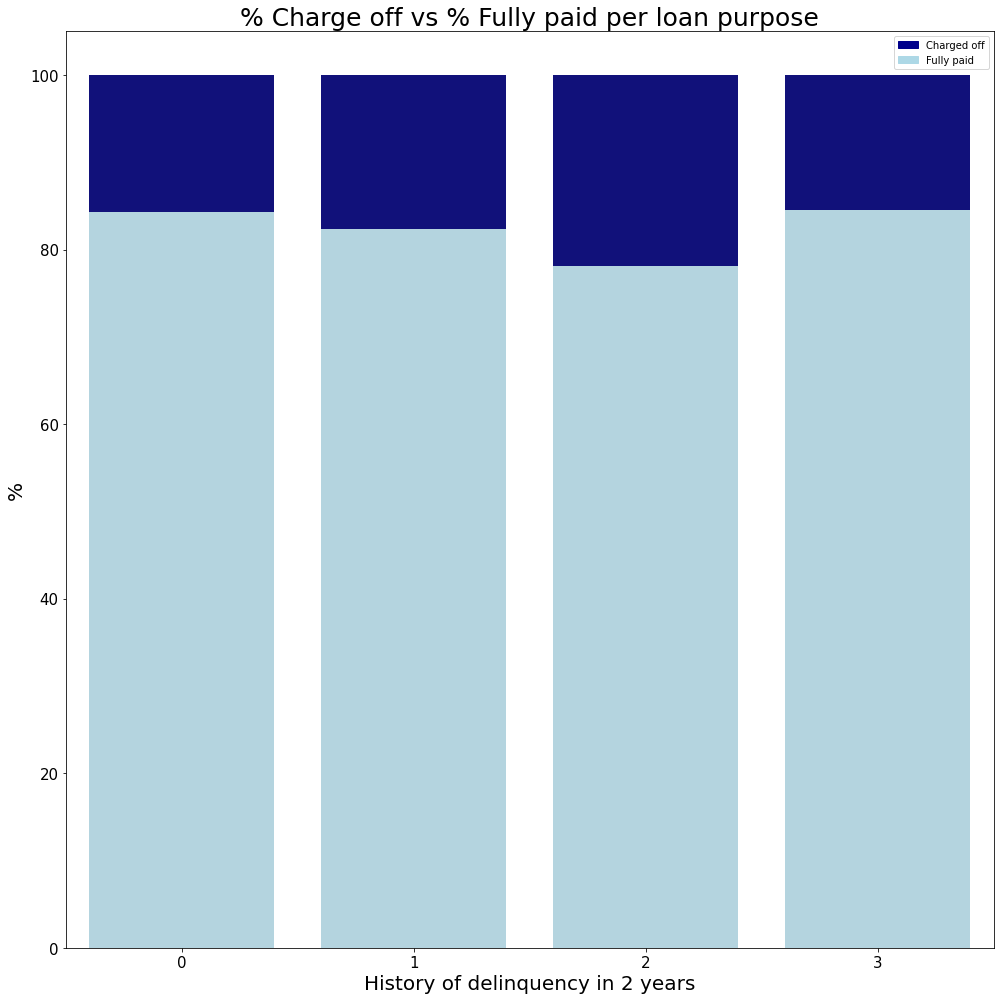

In [28]:
## remove outliers, but we don't need to reload the previous pivot table.
data = data[data['delinq_2yrs'] < 4]

plt.figure(figsize=(14, 14))
## using Seaborn packages to draw stacked bar. In Seaborn, there is no stacked bar, so work-around solution is required.

## First, building a bar chart with total value
## as we don't reload pivot table, we need to drop outliers on charts
bar1 = sns.barplot(data = pivot_del_2yrs.drop(axis=0, index=pivot_del_2yrs.index[pivot_del_2yrs.index >= 4]) 
                   , x = pivot_del_2yrs.index[pivot_del_2yrs.index < 4]
                   , y = 'Grand percent'
                   , color="darkblue"
                  )

## Second, building a smaller chart with % charge off value, and placing both chart on top each other.
## as we don't reload pivot table, we need to drop outliers on charts
bar2 = sns.barplot(data = pivot_del_2yrs.drop(axis=0, index=pivot_del_2yrs.index[pivot_del_2yrs.index >= 4])
                   , x = pivot_del_2yrs.index[pivot_del_2yrs.index < 4]
                   , y = "% Amount fully Paid"
                   , color="lightblue"
                   , estimator=sum
                  )

## Third, adding legend to distinguish them.
top_bar = mpatches.Patch(color='darkblue', label='Charged off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully paid')
plt.legend(handles=[top_bar, bottom_bar])

## Finally, formatting the chart and making it look nicer.
bar2.set_xlabel("History of delinquency in 2 years", fontsize = 20) ## since the bar2 is overlap the bar1, we just need to format the bar2
bar2.set_ylabel("%", fontsize=20)
bar2.set_title("% Charge off vs % Fully paid per loan purpose", fontsize=25)
bar2.tick_params(labelsize = 15)

plt.show()

## Bivariate analysis

#### home_ownership vs loan_purpose
Recall from home_ownership and loan_purpose section, we identify some interest patterns about bad debts:
* Customers who rent home are more likely to turn bad debt
* Customers who apply loan for following purpose are more likely to turn bad debt
    * Small business
    * Vacation
    * renewable energy
    
Should their combination bring more interesting view?

In [29]:
home_purpose = pd.pivot_table(data
                              , values="loan_amnt"
                              , columns = ["home_ownership", "loan_status"]
                              , index = "purpose"
                              , aggfunc='sum'
                             )

#creating a sub total amount column
home_purpose['MORTGAGE loan amount'] = home_purpose[('MORTGAGE', 'Charged Off')] + home_purpose[('MORTGAGE', 'Fully Paid')]
home_purpose['OWN loan amount'] = home_purpose[('OWN', 'Charged Off')] + home_purpose[('OWN', 'Fully Paid')]
home_purpose['RENT loan amount'] = home_purpose[('RENT', 'Charged Off')] + home_purpose[('RENT', 'Fully Paid')]
home_purpose['Total amount'] = home_purpose['MORTGAGE loan amount'] +  home_purpose['OWN loan amount'] + home_purpose['RENT loan amount']

#deriving three new metrics which are % amount charge off and % fully paid. Those two new metrics are used to build 100% stack bar.
home_purpose['% MORTGAGE charged off'] = round(home_purpose[('MORTGAGE', 'Charged Off')]  / home_purpose['MORTGAGE loan amount'] * 100, 2)
home_purpose['% MORTGAGE Fully Paid'] = round(home_purpose[('MORTGAGE', 'Fully Paid')]  / home_purpose['MORTGAGE loan amount'] * 100, 2)
home_purpose['% MORTGAGE status'] = 100

home_purpose['% OWN charged off'] = round(home_purpose[('OWN', 'Charged Off')]  / home_purpose['OWN loan amount'] * 100, 2)
home_purpose['% OWN Fully Paid'] = round(home_purpose[('OWN', 'Fully Paid')]  / home_purpose['OWN loan amount'] * 100, 2)
home_purpose['% OWN status'] = 100

home_purpose['% RENT charged off'] = round(home_purpose[('RENT', 'Charged Off')]  / home_purpose['RENT loan amount'] * 100, 2)
home_purpose['% RENT Fully Paid'] = round(home_purpose[('RENT', 'Fully Paid')]  / home_purpose['RENT loan amount'] * 100, 2)
home_purpose['% RENT status'] = 100

home_purpose

home_ownership        MORTGAGE                    OWN                   RENT  \
loan_status        Charged Off Fully Paid Charged Off Fully Paid Charged Off   
purpose                                                                        
car                     493250    4574850      101675     939225      542350   
credit_card            3476825   24929450      441175    2606800     3072300   
debt_consolidation    17429025   87794800     2400975   12346025    17166275   
educational             132150     626150       58750      52750      244300   
home_improvement       3213975   23163125      451825    2851450      338400   
house                   287600    1723950       28000     395975      430175   
major_purchase          685525    7249775      223850    1499050     1068600   
medical                 405350    2248400       87800     387325      403100   
moving                   98475    1032175       24875     168800      393050   
other                  1963225   10951375      499050    2447425     2640125   
renewable_energy         69800     411550        6000      66125       81200   
small_business         3575950    9654975      453475     726250     2666250   
vacation                 95125     688925       14400     133200      201900   
wedding                 375900    2638875       17400     460200      638450   

home_ownership                MORTGAGE loan amount OWN loan amount  \
loan_status        Fully Paid                                        
purpose                                                              
car                   3402800              5068100         1040900   
credit_card          22982625             28406275         3047975   
debt_consolidation   86596875            105223825        14747000   
educational            976000               758300          111500   
home_improvement      1838525             26377100         3303275   
house                 1759800              2011550          423975   
major_purchase        6355450              7935300         1722900   
medical               1836225              2653750          475125   
moving                2014975              1130650          193675   
other                11657725             12914600         2946475   
renewable_energy       203200               481350           72125   
small_business        5771125             13230925         1179725   
vacation               867750               784050          147600   
wedding               4767775              3014775          477600   

home_ownership     RENT loan amount Total amount % MORTGAGE charged off  \
loan_status                                                               
purpose                                                                   
car                         3945150     10054150                   9.73   
credit_card                26054925     57509175                  12.24   
debt_consolidation        103763150    223733975                  16.56   
educational                 1220300      2090100                  17.43   
home_improvement            2176925     31857300                  12.18   
house                       2189975      4625500                  14.30   
major_purchase              7424050     17082250                   8.64   
medical                     2239325      5368200                  15.27   
moving                      2408025      3732350                   8.71   
other                      14297850     30158925                  15.20   
renewable_energy             284400       837875                  14.50   
small_business              8437375     22848025                  27.03   
vacation                    1069650      2001300                  12.13   
wedding                     5406225      8898600                  12.47   

home_ownership     % MORTGAGE Fully Paid % MORTGAGE status % OWN charged off  \
loan_status                                                                    
purpose     

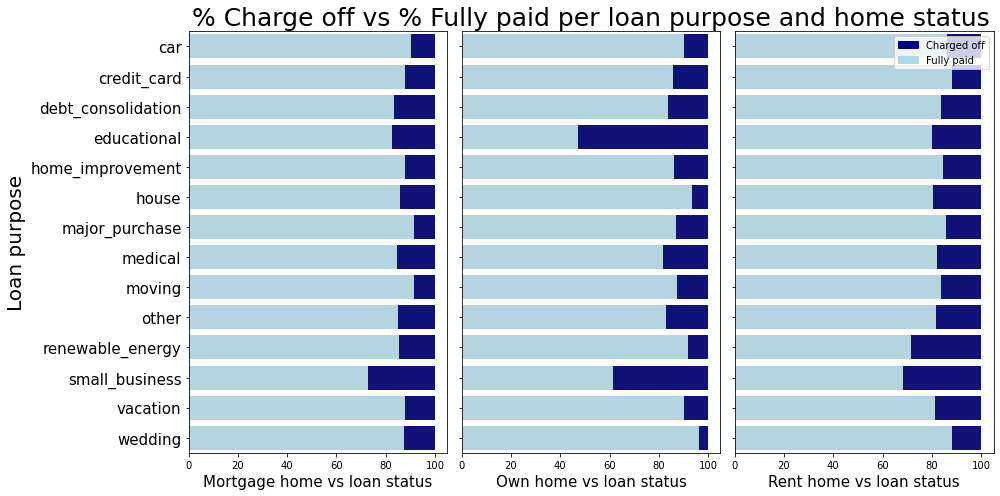

In [30]:
plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 3)

## mortgage home loan status
mortgage_1 = sns.barplot(data = home_purpose
                         , y = home_purpose.index
                         , x = '% MORTGAGE status'
                         , color="darkblue"
                         , orient = "h"
                         , ax = axes[0]
                        )
mortgage_2 = sns.barplot(data = home_purpose
                         , y = home_purpose.index
                         , x = "% MORTGAGE Fully Paid"
                         , color="lightblue"
                         , estimator=sum
                         , orient = "h"
                         , ax = axes[0]                   
                        )
## own home loan status
own_1 = sns.barplot(data = home_purpose
                         , y = home_purpose.index
                         , x = '% OWN status'
                         , color="darkblue"
                         , orient = "h"
                         , ax = axes[1]
                        )
own_2 = sns.barplot(data = home_purpose
                         , y = home_purpose.index
                         , x = "% OWN Fully Paid"
                         , color="lightblue"
                         , estimator=sum
                         , orient = "h"
                         , ax = axes[1]                   
                        )
## rent home loan status
rent_1 = sns.barplot(data = home_purpose
                     , y = home_purpose.index
                     , x = '% RENT status'
                     , color="darkblue"
                     , orient = "h"
                     , ax = axes[2]
                     )
rent_2 = sns.barplot(data = home_purpose
                     , y = home_purpose.index
                     , x = "% RENT Fully Paid"
                     , color="lightblue"
                     , estimator=sum
                     , orient = "h"
                     , ax = axes[2]                   
                     )

## Third, adding legend to distinguish them.
top_bar = mpatches.Patch(color='darkblue', label='Charged off')
bottom_bar = mpatches.Patch(color='lightblue', label='Fully paid')
plt.legend(handles=[top_bar, bottom_bar])

## Finally, formatting the chart and making it look nicer.
mortgage_2.set_xlabel("Mortgage home vs loan status", fontsize = 15)
mortgage_2.set_ylabel("Loan purpose", fontsize=20)
# mortgage_2.set_yticklabels(mortgage_2.get_xticks(), size=15)
mortgage_2.set_yticklabels(mortgage_2.get_yticklabels(), size=15)

own_2.set_xlabel("Own home vs loan status", fontsize = 15) 
own_2.set_title("% Charge off vs % Fully paid per loan purpose and home status", fontsize=25)
own_2.set(yticklabels=[]) ### hiding y stick label, using the very left stick label
own_2.set(ylabel=None) ### hiding y stick label, using the very left stick label

rent_2.set_xlabel("Rent home vs loan status", fontsize = 15)
rent_2.set(yticklabels=[]) ### hiding y stick label, using the very left stick label
rent_2.set(ylabel=None) ### hiding y stick label, using the very left stick label

plt.show()

As previous comments in loan purpose, there are 3 warnings loan purposes (that may lead to potential bad debts), which are:
* small business
* educational
* renewable energy

When adding home status, we see there is an additional strong indicator, which are:
* own home - applying loan for educational
* own home - applying loan for small business

## Derived metrics
#### Last tenor before charging off

None customers turn bad at the very begining of their loans. They usually make at least serveral payment before turning bad and becoming delinquent. By analysing the last installment number customers make payment, hopefully we can find some hint to detect potential delinquent customers.

Doing so we need:
1. Total actual payment (dividend) and installment (divisor).
2. The result of total actual payment divide installment is the last installment number customers pay.

In [31]:
# Deriving new metrics representing last installment numbers customers made
data['paid_installments'] = round(data['total_pymnt'] / data['installment'], 0)

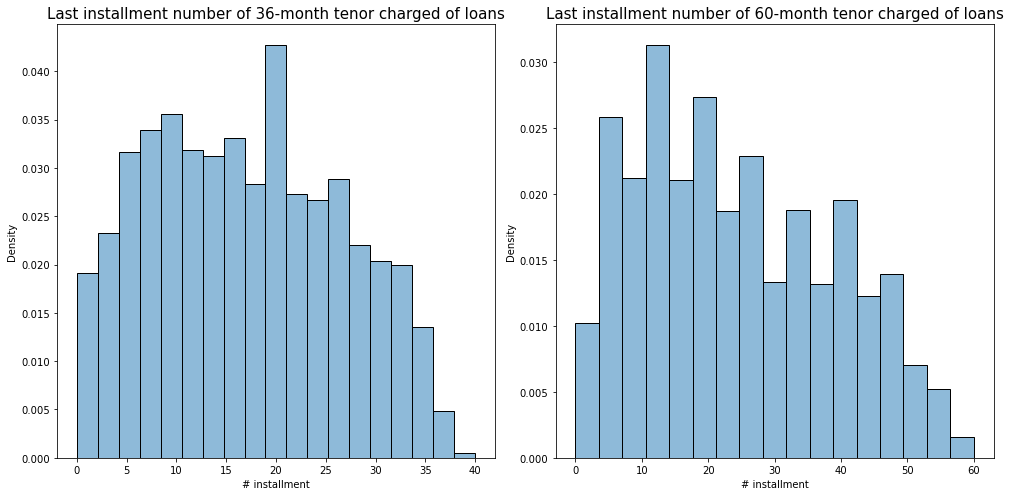

In [32]:
plt.rcParams["figure.figsize"] = [14, 7]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(1, 2)

# Since customers who fully paid always have paid_installments equal term, we will only focus on charged off customers.
# Besides, we should split into two histogram, one for 60 months and another one is for 60 months
hist_36_months = sns.histplot(data[(data['loan_status'] == 'Charged Off') & (data['term'] == " 36 months")]
                              , x='paid_installments'
                              , hue='loan_status'
                              , stat="density"
                              , ax = axes[0]
                              , legend=False
                             )
# histogram for 60 months
hist_60_months = sns.histplot(data[(data['loan_status'] == 'Charged Off') & (data['term'] == " 60 months")]
                              , x='paid_installments'
                              , hue='loan_status'
                              , stat="density"
                              , ax = axes[1]
                              , legend=False
                             )

## formatting two histograms
hist_36_months.set_title("Last installment number of 36-month tenor charged of loans", fontsize=15)
hist_36_months.set_xlabel("# installment", fontsize = 10)

hist_60_months.set_title("Last installment number of 60-month tenor charged of loans", fontsize=15)
hist_60_months.set_xlabel("# installment", fontsize = 10)

plt.show()


There is one drawbacks in this analysis, it's fee collection, which is also collected and counted in total payment. That's why on the left charts, there are 17 loans which paid to installment beyond the tenor.

It seems that the 10th to 15th installments are very important to determine if customers continue paying or not.

#### % of principal received

When principal is fully paid, a loan is considered fully paid, vice versa. Therefore, this variable is important to consider potential customer's delinquency.

In [33]:
# Deriving new metrics represent percentage principal received over loan amount
data['percent_rec_prncp'] = round(data['total_rec_prncp'] / data['loan_amnt'] * 100, 2)

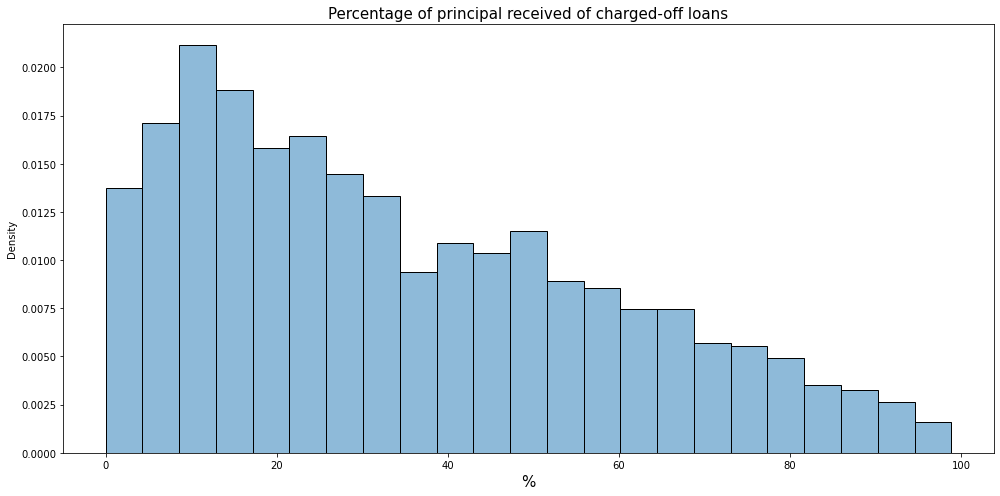

In [34]:
hist_1 = sns.histplot(data[data['loan_status'] == 'Charged Off']
             , x='percent_rec_prncp'
             , hue='loan_status'
             , stat="density"
             , legend=False
            )

hist_1.set_title("Percentage of principal received of charged-off loans", fontsize=15)
hist_1.set_xlabel("%", fontsize = 15)

plt.show()

Another interesting indicator, majority of delinquent customers are stop paying after paying up to 10-20% of outstanding principal.

## Conclusion

There are severals helpful indicators that may help to prevent lending out money to high potential deliquency customers.

1. Year of employment
    * By right, the longer years of experience prove the higher credit trust. In this case study customers, who are with more than 8 years of experience, tend to less pay off the loans.
2. Loan purpose
    * Small business, educational, renewable energy are three purposes that need to handle with care.
    * Especially, combing loan purpose with home ownership status, we have another stronger indicators showing that customers, who own a home, apply for loans to study or to invest in small business tend to less pay the loans compared to others.
3. Debt to income
    * Another surprised indicators is debt to income. Usually, the higher debt to income ratio prove the abilities to pay back the loans. In this case study we find out that the higher the ratio, the higher the percentage of charged off.

Once a loan is disbursed to a customers, two additional indicators should be taken into consideration:
1. Number of installment
    * When customers reach to installment 10th to 15th, additional collection operations should be performed to make sure all loans are recovered.
2. Percent of principal received
    * This is not a very strong indicator, but it's no harm to additionally monitor. Similarity, when 10-20% principal are collection, we should involve more operations to monitor and ensure more principal are collected.